In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import h5py  
import pandas as pd
import numpy as np
import os

In [4]:

os.chdir("../TESTS/")

df = pd.read_pickle("dataframe_POP_LME_tssos_vs_random_trn4_tst20_fix-Phi-up_2024-Jan-09_at_14-34.pkl")

In [5]:
df

,Gamma,State,Time,gt,F_lme_exact,F_sidlme_lme_rnd,F_sidlme_lme_tssos,F_sidexact_exact_rnd,F_sidexact_exact_tssos,Distance
0,0.079477,1,0.06000,0.004769,1.000000,1.0,1.000000,1.000000,1.000000,0.341925
1,0.079477,1,0.08000,0.006358,0.999997,1.0,0.999998,1.000000,1.000000,0.341925
2,0.079477,1,0.10000,0.007948,0.999982,1.0,0.999994,1.000000,1.000000,0.341925
3,0.079477,1,0.12000,0.009537,0.999972,1.0,0.999988,1.000000,1.000000,0.341925
4,0.079477,1,0.14000,0.011127,0.999986,1.0,0.999979,0.999996,0.999996,0.341925
...,...,...,...,...,...,...,...,...,...,...
751,79.477,9,0.23800,18.915526,0.788154,1.0,1.000000,0.999996,0.999996,0.277180
752,79.477,9,0.23825,18.935395,0.788127,1.0,1.000000,0.999995,0.999995,0.277180
753,79.477,9,0.23850,18.955264,0.788101,1.0,1.000000,0.999995,0.999995,0.277180
754,79.477,9,0.23875,18.975134,0.788078,1.0,1.000000,0.999995,0.999995,0.277180


In [9]:
df['Infid_sb_tssos'] = 1-df['F_sidexact_exact_tssos']
df['Infid_sb_tssos'] = df['Infid_sb_tssos'].abs()
df['Log_Infid_sb_tssos'] = np.log10(df['Infid_sb_tssos'])
df.loc[df["Log_Infid_sb_tssos"] < -12, "Log_Infid_sb_tssos"] = -12


df['Infid_sb_rnd'] = 1-df['F_sidexact_exact_rnd']
df['Infid_sb_rnd'] = df['Infid_sb_rnd'].abs()
df['Log_Infid_sb_rnd'] = np.log10(df['Infid_sb_rnd'])
df.loc[df["Log_Infid_sb_rnd"] < -12, "Log_Infid_sb_rnd"] = -12

/home/zah/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/zah/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
gammas = ['0.079477', '0.25133', '0.79477', '2.5133', '7.9477', '25.133', '79.477', '251.33']

df.replace(to_replace= '0.079477', value = '0.079', inplace=True )
df.replace(to_replace= '0.79477', value = '0.795', inplace=True )
df.replace(to_replace= '0.25133', value = '0.251', inplace=True )
df.replace(to_replace= '2.5133', value = '2.513', inplace=True )
df.replace(to_replace= '7.9477', value = '7.948', inplace=True )

df['Gamma'] = df['Gamma'].astype(float)

pd.unique(df["Gamma"])

array([7.9000e-02, 2.5100e-01, 7.9500e-01, 2.5130e+00, 2.5133e+01,
       2.5133e+02, 7.9480e+00, 7.9477e+01])

In [11]:
def log_infidelity_from_gamma(df, title, method):
   
    fig, ax = plt.subplots(1, 1, figsize=(6,6))
    
    sns.violinplot(ax=ax, data=df, x="Gamma", y="Log_Infid_sb_"+method, cut = 0, # hue = "Method", split=True,
                        scale="width", palette ="cool", linewidth=0.5,
                        inner= None, bw="silverman")
    
    ymin = -6
    ymax = -0.1
    
    tick_range = np.arange(ymin, ymax)
    ax.yaxis.set_ticks(tick_range, [r'$10^{-6}$', r'$10^{-5}$', r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$',])
    ax.yaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

    ax.set_title(title)
    ax.set_ylim(ymin, ymax)
    ax.set_xlabel(r'Coupling $\gamma$')
    ax.set_ylabel(r'Infidelity $(1-F)$')
    
    ax.hlines(y=np.log10(.01), xmin=-0.5, xmax=6.5, colors='black', linestyles='--', alpha=0.8)
    ax.text(6.7, np.log10(.01), '0.01', ha='left', va='center')
    
    ax.hlines(y=np.log10(.02), xmin=-0.5, xmax=6.5, colors='black', linestyles='--', alpha=0.8)
    ax.text(6.7, np.log10(.02), '0.02', ha='left', va='center')
 
    return fig

/tmp/ipykernel_40715/1793532141.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


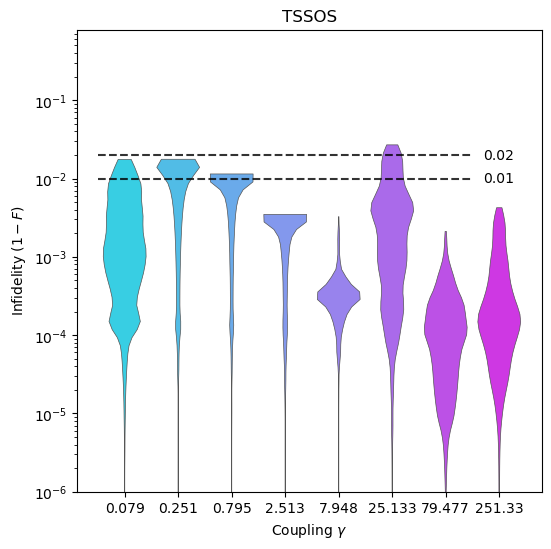

In [12]:
fig = log_infidelity_from_gamma(df, "TSSOS", "tssos")
fig.show()

/tmp/ipykernel_40715/2225554274.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


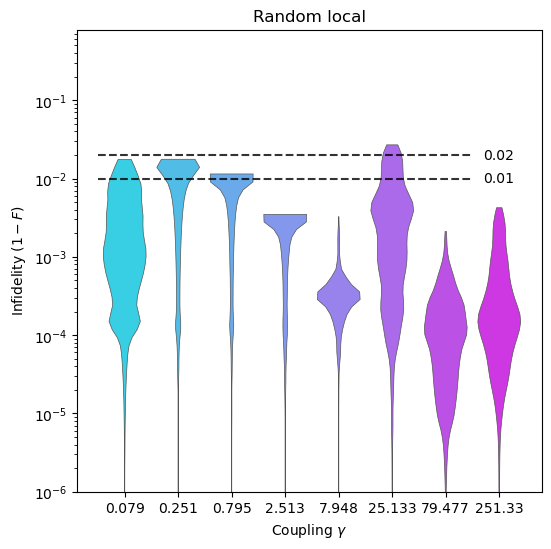

In [13]:
fig = log_infidelity_from_gamma(df, "Random local", "rnd")
fig.show()